## Ch.6 차원 축소(Dimension Reduction)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

### 공분산 행렬

### PCA 변환

### 6.2 PCA(princial Compotnent Analysis)

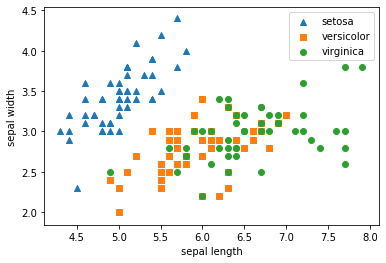

In [8]:
iris = load_iris()
#넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's','o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

#Targer 값을 제외한 모든 속성 값을 StandardScaler를 이요해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit()과 transform()을 호출해 PCA변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [16]:
#PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


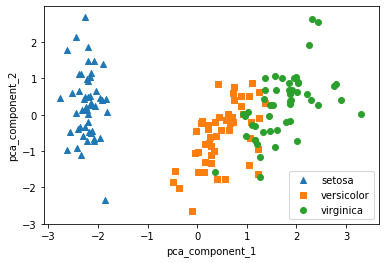

In [17]:
#pca_componet_1을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [18]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]
